In [3]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("C:\\Users\\Mrinmoy\\Downloads\\Documents\\telecom_churn.csv")
print(data.head())

   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1   

In [5]:
data.shape

(243553, 14)

In [6]:
data.columns.values

array(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents',
       'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype=object)

In [7]:
data.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [8]:
# Check the descriptive statistics of numeric variables
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


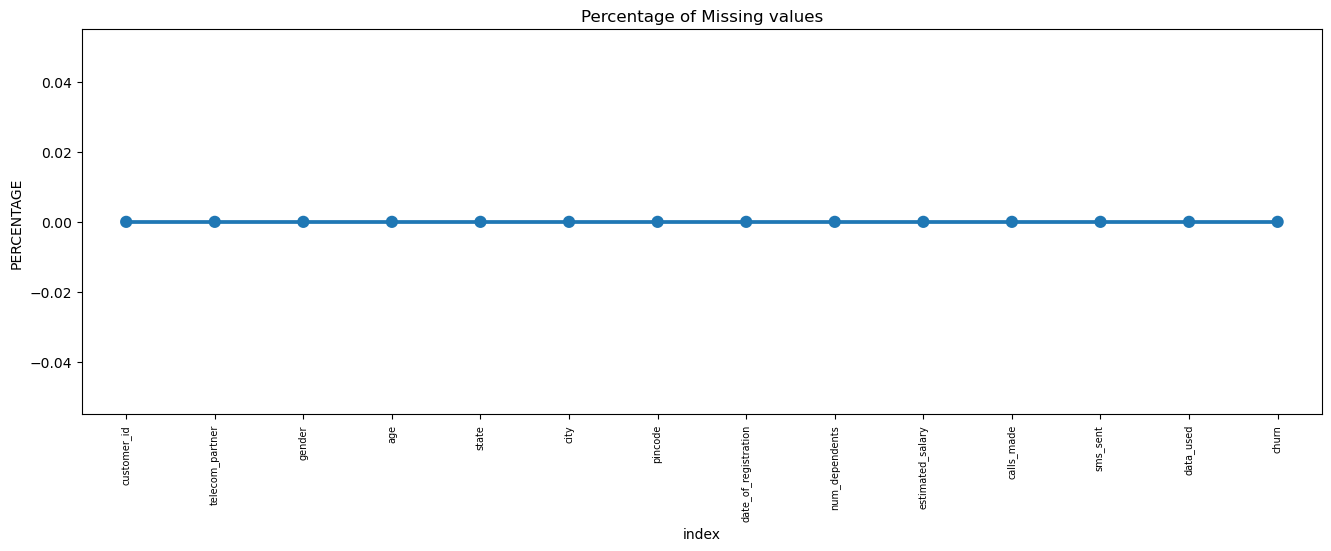

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame of missing values percentage
missing = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0]).reset_index()

# Plot using Seaborn with keyword arguments
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [10]:
# Data Cleaning
data1 = data.copy()

In [11]:
data1.estimated_salary = pd.to_numeric(data1.estimated_salary, errors='coerce')
data1.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [12]:
#drop column customerID 
data1.drop(columns= ['customer_id'], axis=1, inplace=True)
data1.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


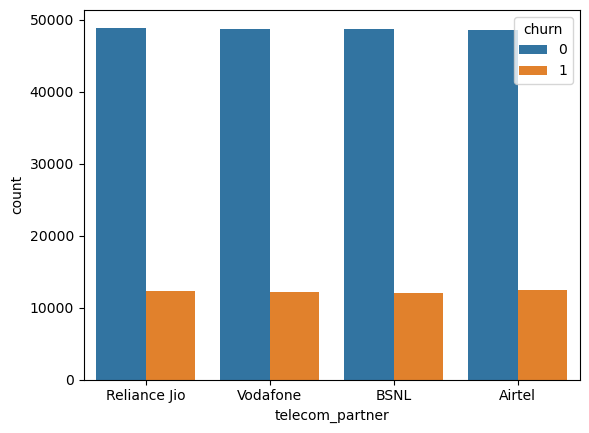

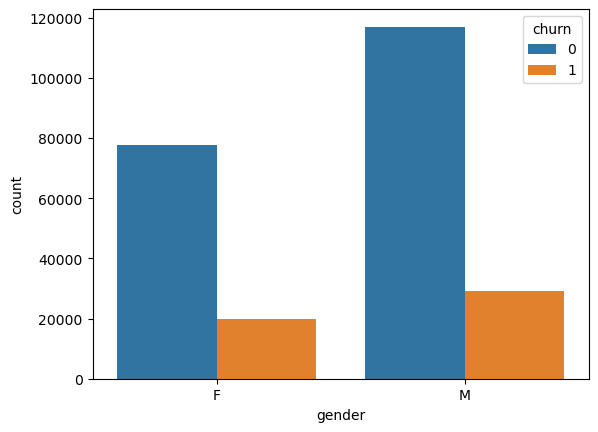

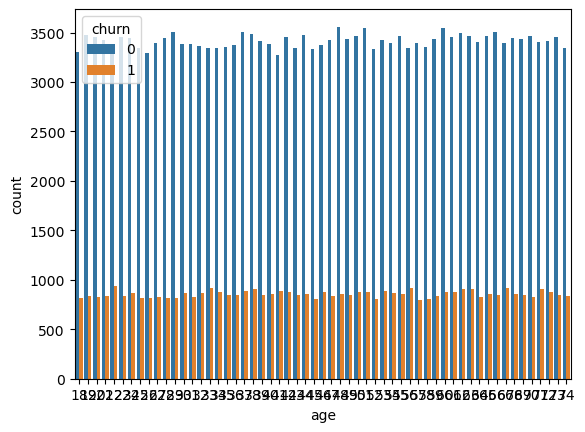

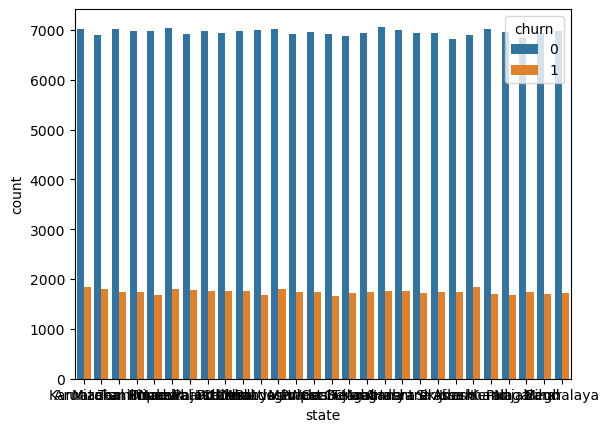

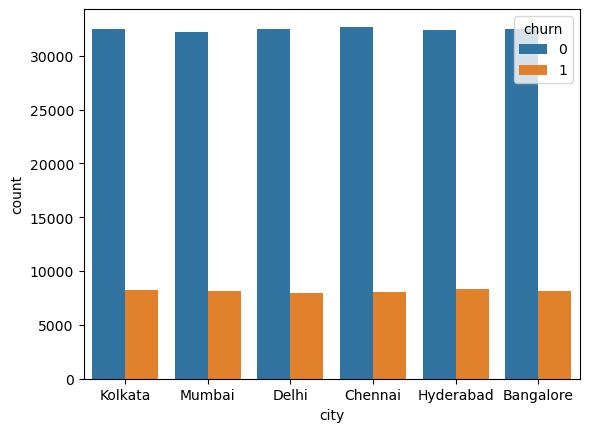

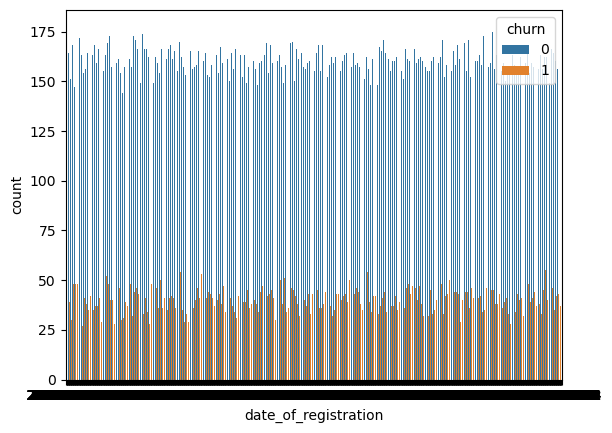

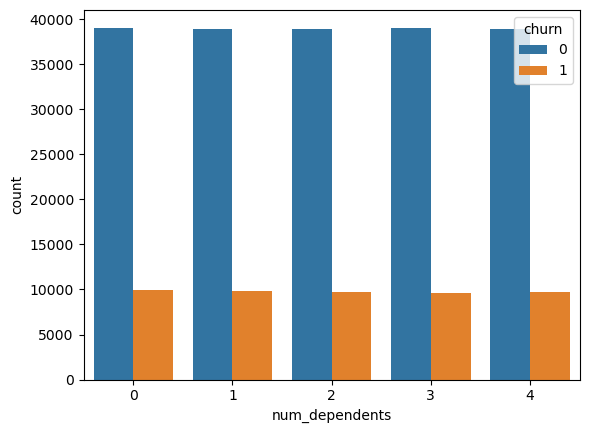

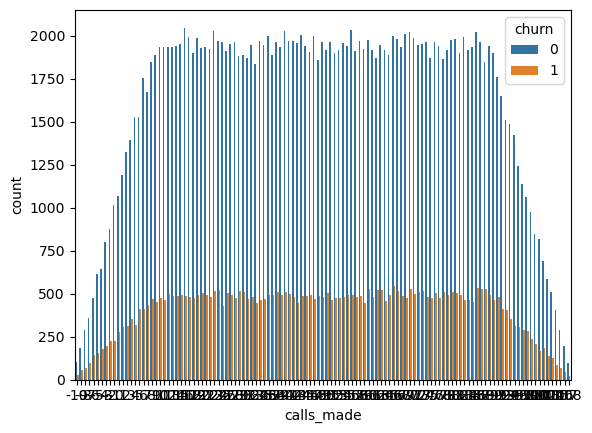

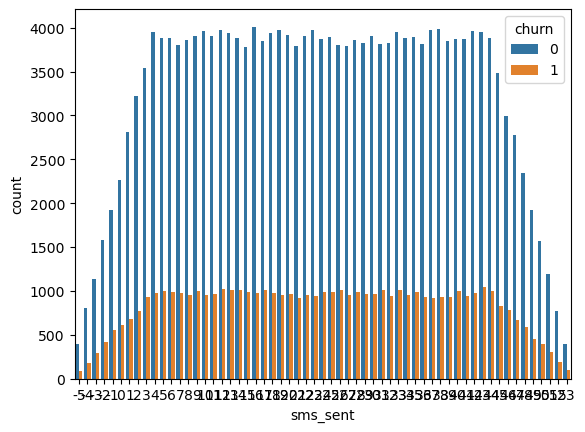

In [13]:
# Data Exploration
#Univariate Analysis
for i, predictor in enumerate(data1.drop(columns=['churn', 'estimated_salary', 'data_used','pincode'])):
    plt.figure(i)
    sns.countplot(data=data1, x=predictor, hue='churn')
    plt.show()

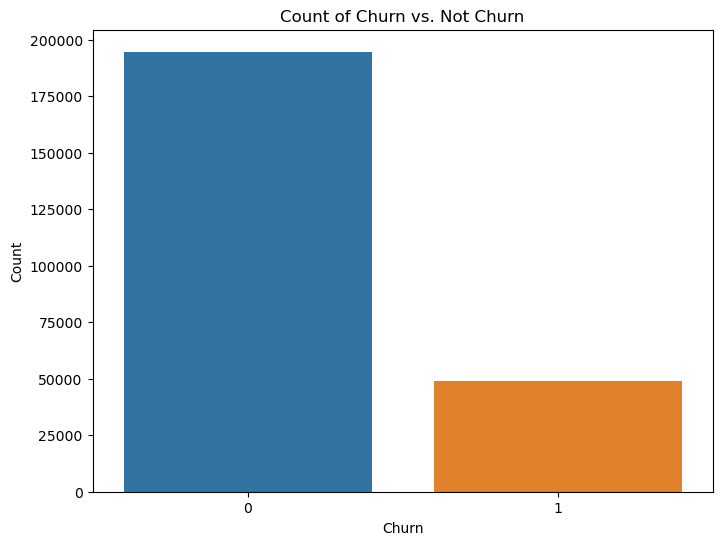

In [14]:

# Count the number of churn and not churn instances
churn_count = data['churn'].value_counts()

# Plot the counts using a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_count.index, y=churn_count.values)
plt.title('Count of Churn vs. Not Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [15]:
#histogram is used to plot the numerical columns in the data set
#plotting multiple numerical columns at once
numerical = ['age', 'pincode','date_of_registration','num_dependents','estimated_salary','calls_made','sms_sent','data_used']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'pincode'}>,
        <Axes: title={'center': 'num_dependents'}>],
       [<Axes: title={'center': 'estimated_salary'}>,
        <Axes: title={'center': 'calls_made'}>,
        <Axes: title={'center': 'sms_sent'}>],
       [<Axes: title={'center': 'data_used'}>, <Axes: >, <Axes: >]],
      dtype=object)

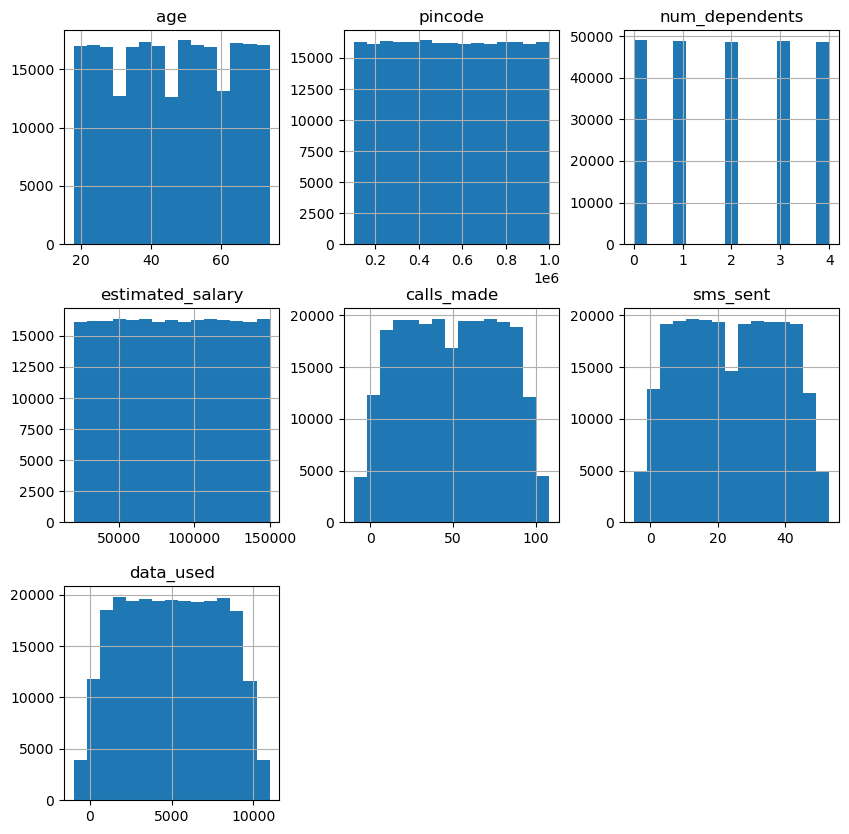

In [16]:
data[numerical].hist(bins = 15, figsize = (10,10))

In [17]:
#Plotting categorical columns
category = ['telecom_partner','gender','state','city']

<Axes: xlabel='gender', ylabel='count'>

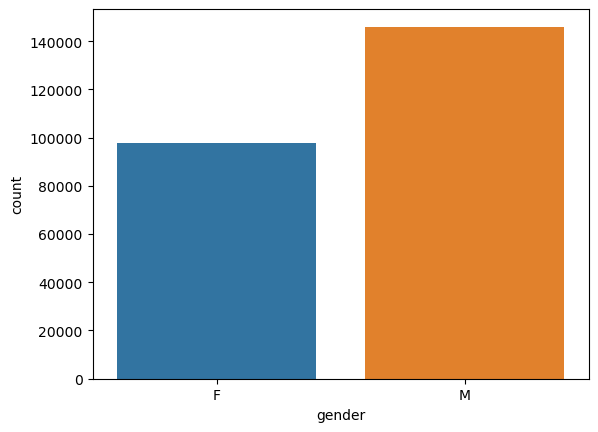

In [18]:
#for categorical columns we use count plots
#to plot single column through sns
sns.countplot(x = 'gender', data = data)

<Axes: xlabel='state', ylabel='count'>

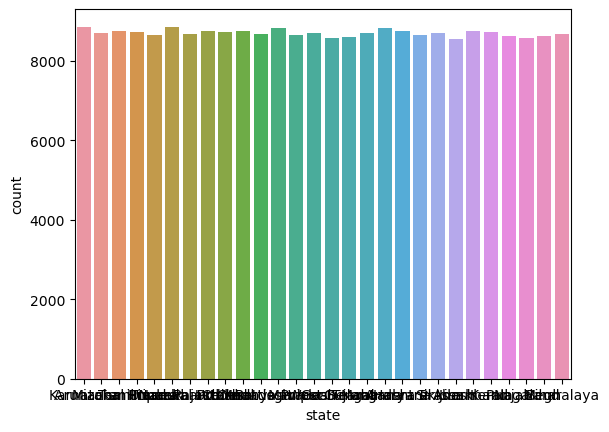

In [19]:
#for categorical columns we use count plots
#to plot single column through sns
sns.countplot(x = 'state', data = data)

<Axes: xlabel='city', ylabel='count'>

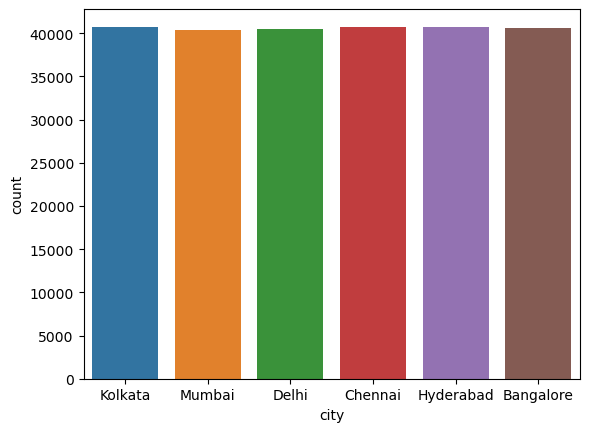

In [20]:
#for categorical columns we use count plots
#to plot single column through sns
sns.countplot(x = 'city', data = data)

<Axes: xlabel='telecom_partner', ylabel='count'>

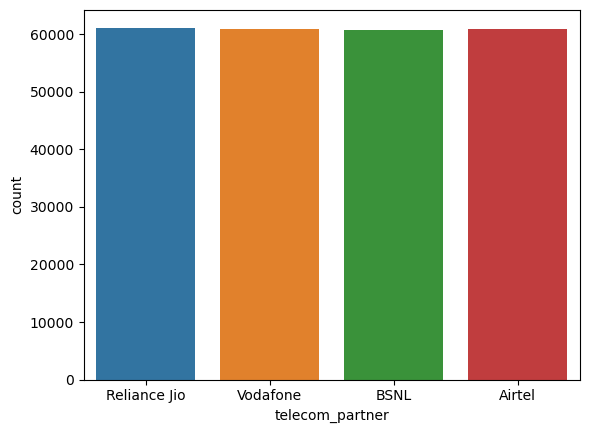

In [21]:
#for categorical columns we use count plots
#to plot single column through sns
sns.countplot(x = 'telecom_partner', data = data)

In [22]:
data.duplicated().sum()

0

In [23]:
data.churn.value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

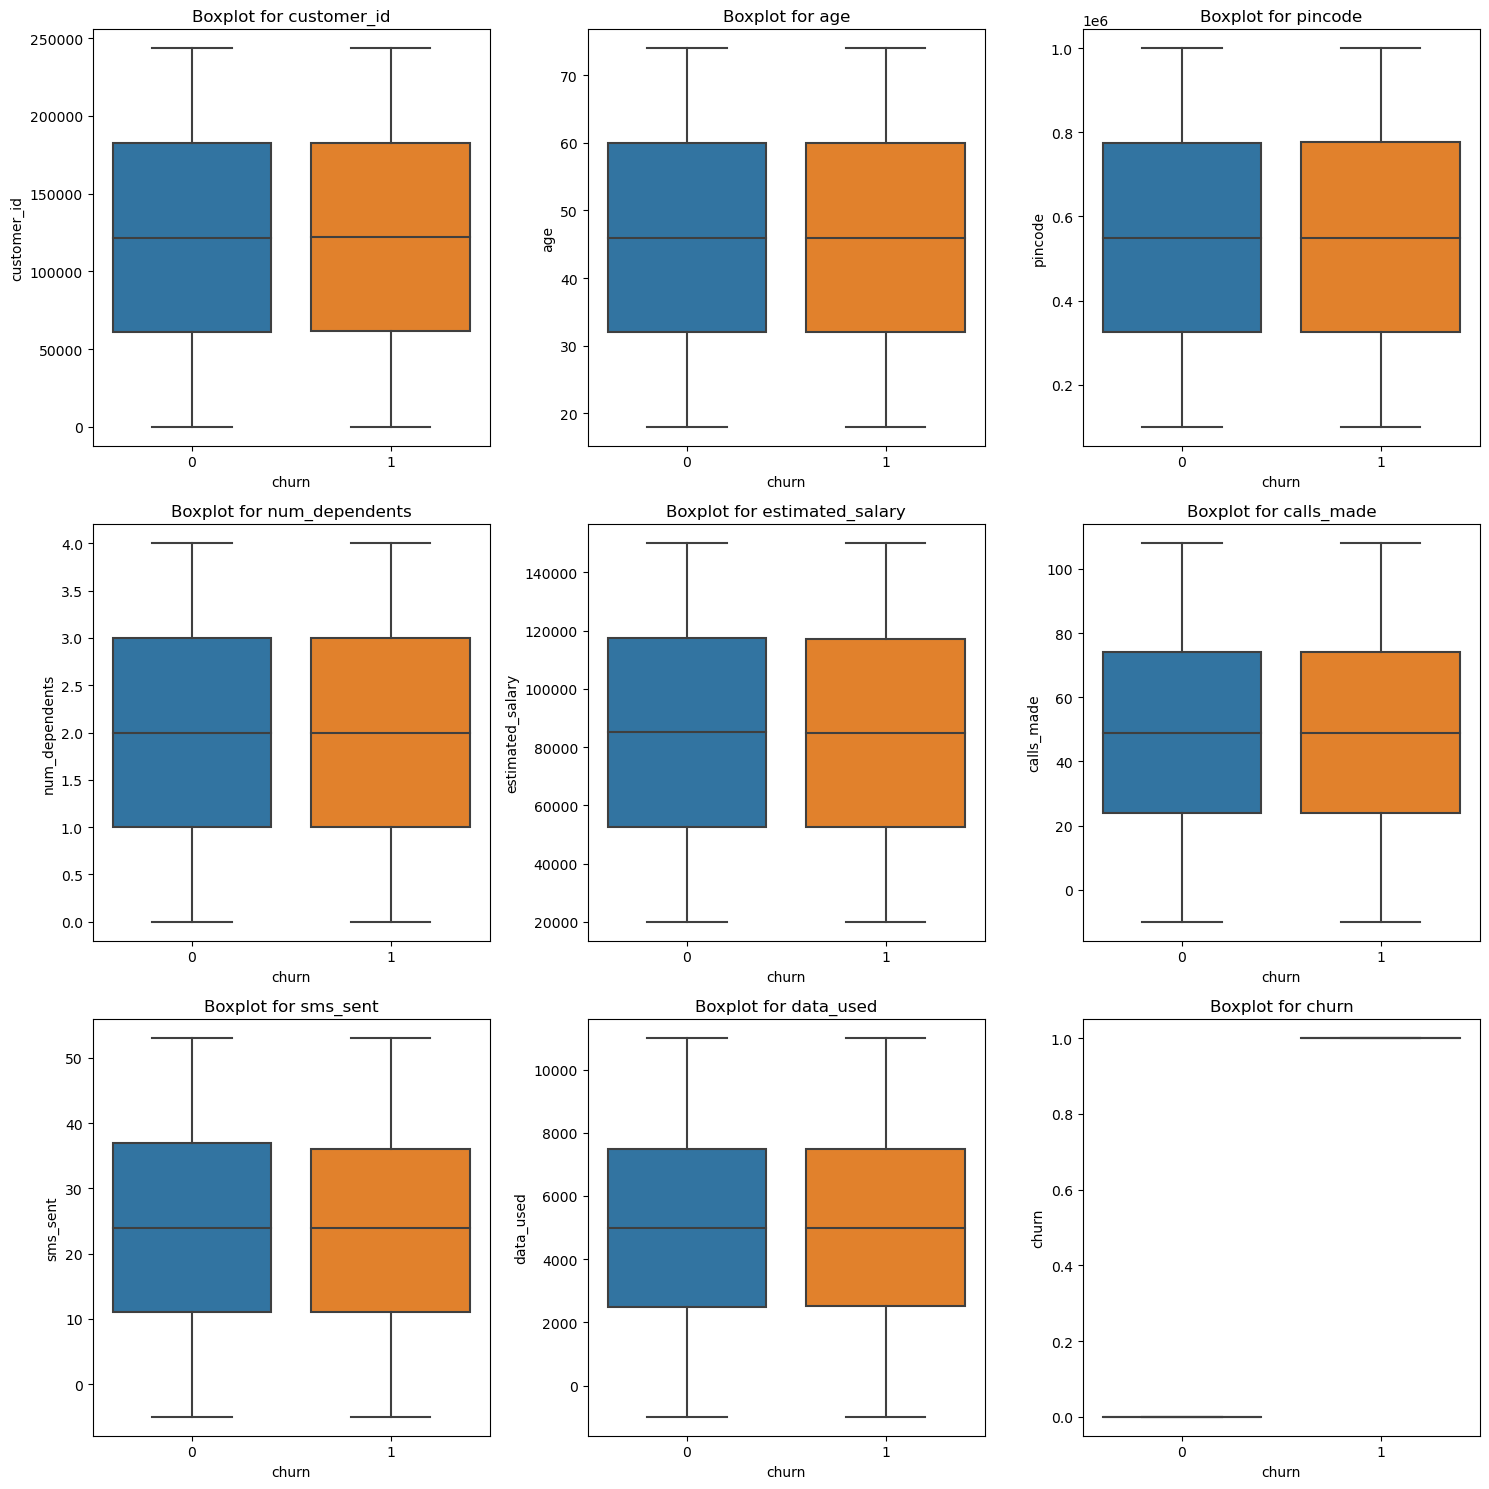

In [24]:
# Selecting numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Iterate through numerical columns and create boxplots
for var, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x='churn', y=var, data=data, ax=subplot)
    subplot.set_title(f'Boxplot for {var}')

# Adjust layout
plt.tight_layout()

In [25]:
data

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


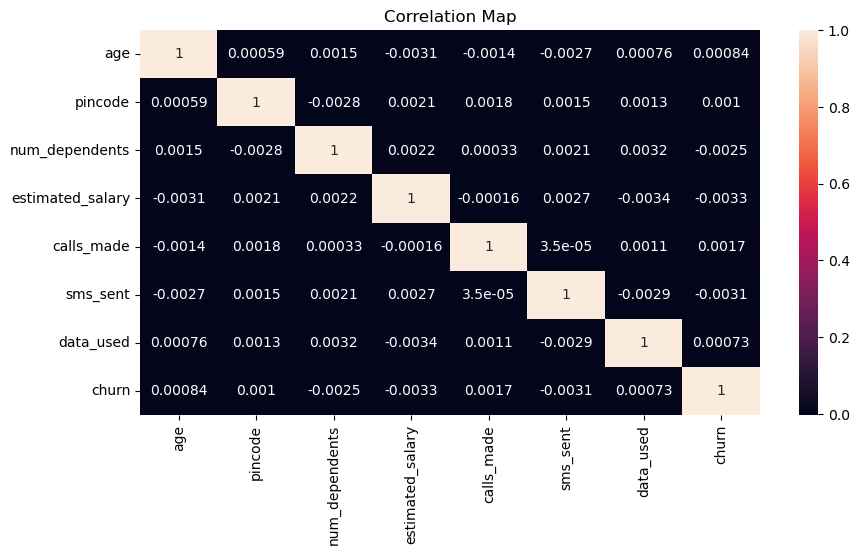

In [26]:
numerical_columns = data1.select_dtypes(include=['int64', 'float64']).columns

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data1[numerical_columns].corr(), annot=True)
plt.title("Correlation Map")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data1.columns:
    if data1[i].dtype=="object":
        data1[i]=model.fit_transform(data1[i])

In [14]:
data1.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


In [29]:
100*data['churn'].value_counts()/len(data['churn'])

churn
0    79.952208
1    20.047792
Name: count, dtype: float64

# Feature Selection Using RFR


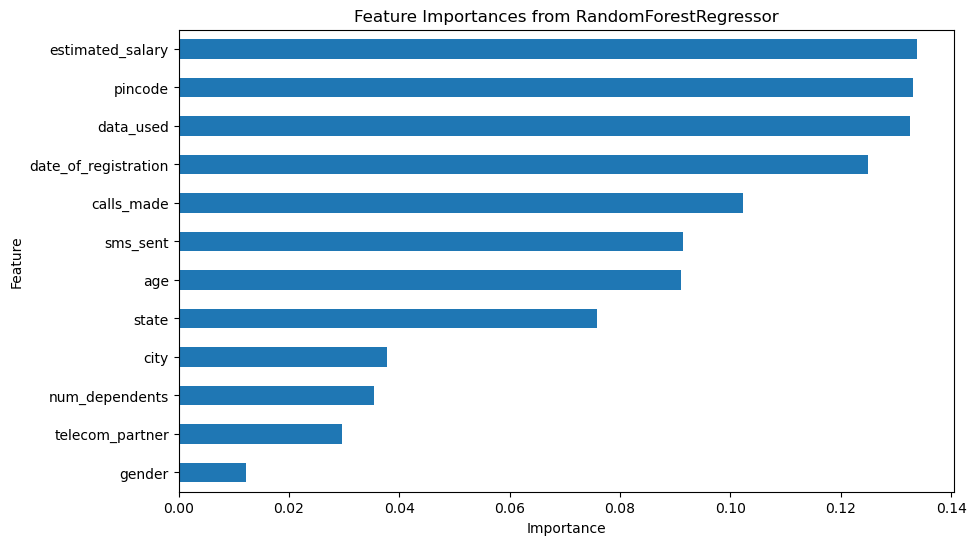

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



# Assuming 'X' is your feature matrix and 'y' is your target variable
X = X=data1[['telecom_partner','gender','age','state','city','pincode','date_of_registration','num_dependents','estimated_salary','calls_made','sms_sent','data_used']]
y = data1['churn']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances and create a Series
model_ranks = pd.Series(rf_model.feature_importances_, index=X_train.columns, name="Importance").sort_values(ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
ax = model_ranks.plot(kind='barh')
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title("Feature Importances from RandomForestRegressor")

plt.show()


In [31]:
#drop columns importance less than 0.5
data1.drop(columns= ['city','num_dependents','telecom_partner','gender'], axis=1, inplace=True)
data1.head()

,age,state,pincode,date_of_registration,estimated_salary,calls_made,sms_sent,data_used,churn
0,25,10,755597,0,124962,44,45,-361,0
1,55,16,125926,0,130556,62,39,5973,0
2,57,1,423976,0,148828,49,24,193,1
3,46,22,522841,0,38722,80,25,9377,1
4,26,24,740247,0,55098,78,15,1393,0


# Model Building

Spliting Data

In [15]:
from sklearn.model_selection import train_test_split
x=data1.drop("churn",axis=1)
y=data1['churn']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rmf = RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [36]:
rmf.fit(x_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [37]:
y_prediction = rmf.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_prediction)*100)

79.94416007445324


Decesion Tree algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT = DecisionTreeClassifier()

In [41]:
DT.fit(x_train, y_train)


DecisionTreeClassifier()

In [42]:
y_predd = DT.predict(x_test)

In [43]:
print(accuracy_score(y_test, y_predd)*100)

66.58226808638766


Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are your training and testing sets
Gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(x_train, y_train)

# Evaluate the model
accuracy = Gb.score(x_test, y_test)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 79.94416007445324


Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 79.94416007445324


Support Vector Machine

In [17]:
from sklearn.svm import SVC
svc = SVC()

In [18]:
svc.fit(x_train,y_train)

SVC()

In [19]:
y_pred = svc.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 79.94416007445324


# Optimization

We found that 80 percent customers not churned and 20 percent customers are churned.So there is a chance that our models are biased.To avoid biasness we will perform upper sampling and again check the models accuracy to notice if there are any optimization.


Over Sampling Data

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [23]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rmf = RandomForestClassifier(criterion = "gini",max_depth=8,min_samples_split=10,random_state=5)

In [26]:
rmf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [27]:
yr_prediction = rmf.predict(xr_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yr_test, yr_prediction)*100)

68.09373823136704


Decesion Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT_r = DecisionTreeClassifier()

In [31]:
DT_r.fit(xr_train, yr_train)

DecisionTreeClassifier()

In [32]:
yr_predd = DT_r.predict(xr_test)

In [33]:
print(accuracy_score(yr_test, yr_predd)*100)

62.68444657468588


Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Assuming xr_train, xr_test, yr_train, yr_test are your training and testing sets
Gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(xr_train, yr_train)

# Evaluate the model
accuracy = Gb.score(xr_test, yr_test)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)


Accuracy: 69.38101270156459


Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logreg_model_r = LogisticRegression(random_state=42)

# Train the model
logreg_model_r.fit(xr_train, yr_train)

# Make predictions on the test set
yr_pred = logreg_model_r.predict(xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, yr_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)


Accuracy: 50.09586086480194


# Conclusion:Smoting data have lower accuracy than the non smoting data.Gradient Boosting have the higher accuracy.